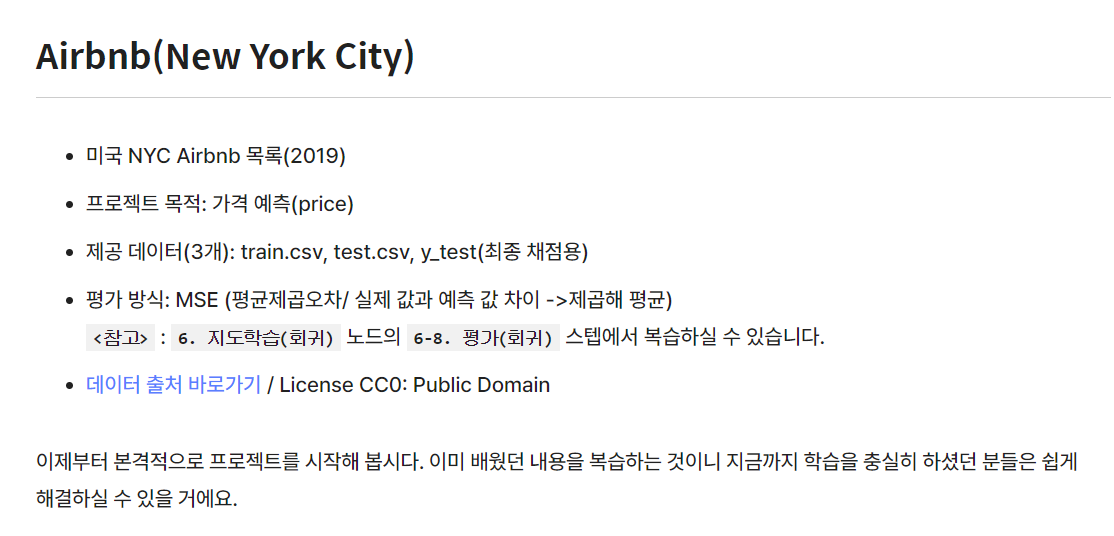

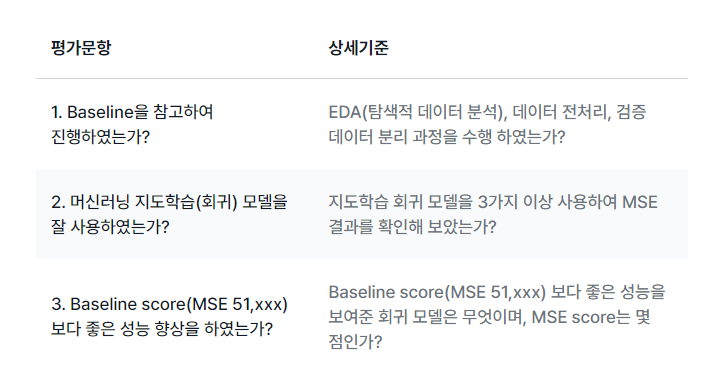

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

((31292, 7), (7824, 7), (31292,), (7824,))

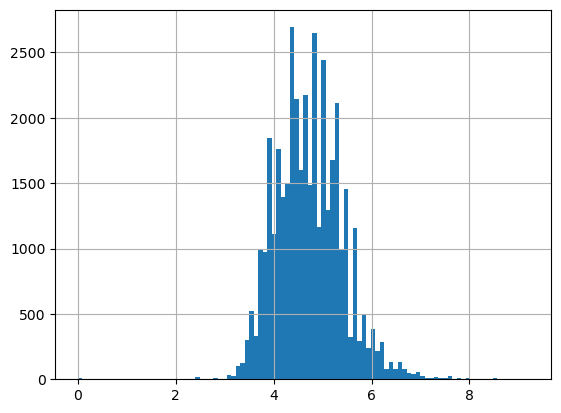

In [24]:
# 라이브러리 
import numpy as np
import pandas as pd
# 데이터 불러오기
train = pd.read_csv('trainairbnb.csv')
test = pd.read_csv('testairbnb.csv')
#eda(탐색적 데이터 분석)

# 데이터 크기
train.shape, test.shape
# 데이터 샘플
display(train.head(2))
display(test.head(2))
# 데이터 타입
train.info()
# 결측치(train)
train.isnull().sum()
# 결측치(test)
test.isnull().sum()
# target(hist)
train['price']=np.log1p(train['price'])#데이터가 한쪽으로 치우쳐져있어서 로그화시켜 정규분포형태로 만들어준다.(모델향상위해)
#train['price']=np.expml(train['price'])#로그로 변환했던값을 나중에 다시 정확도 비교를위해 test와 같은 범주로 만들어줘야된다.
train['price'].hist(bins=100)
# # target(describe)
# train['price'].describe()#백분위수
# # 피처(host_id)
# train['host_id'].value_counts()#항목별 개수

#데이터 전처리

# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review',axis=1)
test = test.drop('last_review',axis=1)
# 결측치 채우기
train = train.drop('reviews_per_month',axis=1)
test = test.drop('reviews_per_month',axis=1)
##모델성능을 위해 결측치값을 바꿔 채웠을때보다 결측치값피처들을 삭제했을때 오차가 더 줄었기때문에 삭제를 시켰습니다.
# train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
# test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
# 결측치 확인
train.isnull().sum()
# 가격 값 복사
target = train['price']#데이터중 가격의 값을 예측하는 프로젝트이니 타겟값중 가격값을 복사
# 수치형 피처 선택
int_feature = [                             
        'host_id' ,                       
        'latitude' ,                       
        'longitude' ,                                       
        'minimum_nights' ,                  
        'number_of_reviews',               
                     
        'calculated_host_listings_count',  
        'availability_365' ]     #price값은 타겟으로 바꿨기때문에 없음(keyerror)   
#수치형데이터를 스케일링(모델향상위해)

from sklearn.preprocessing import MinMaxScaler#수치형데이터들이기때문에 스케일러를 통해 데이터를 정규화시켜 모델이 학습하기 편하도록 만들었다.
scaler = MinMaxScaler()
scaler.fit_transform(train[int_feature])    
scaler.fit_transform(test[int_feature])       
train = scaler.fit_transform(train[int_feature])   
test = scaler.fit_transform(test[int_feature])     
#train[int_feature]:원래 시도했던값
#test[int_feature]:원래 시도했던값
train
test
#검증데이터 분리
from sklearn.model_selection import train_test_split # 데이터나눌때 사용
X_train,X_test,y_train,y_val=train_test_split(train,target,test_size=0.2,random_state=2022)
X_train.shape,X_test.shape,y_train.shape,y_val.shape

In [35]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#예측
pred = model.predict(X_test)#예측값을 활용하기위해 변수로 지정
pred = np.expm1(pred)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,pred)

13379.013692962088

In [36]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)

#예측
pred = model.predict(X_test)#예측값을 활용하기위해 변수로 지정
pred = np.expm1(pred)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,pred)

13365.636210214365

In [37]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)

#예측
pred = model.predict(X_test)#예측값을 활용하기위해 변수로 지정
pred = np.expm1(pred)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,pred)

11756.150907432313

In [38]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1)#기본alpha값 = 1 , alpha 값이 크면 규제의 강도가 강해지고 작으면 약해진다.
model.fit(X_train, y_train)#모델에 학습
pred = model.predict( X_test)#모델예측값
pred = np.expm1(pred)
mean_squared_error(y_val,pred)

11756.150907432313

In [39]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)#모델에 학습
pred = model.predict( X_test)#모델예측값
pred = np.expm1(pred)
mean_squared_error(y_val,pred)

20553.415431444264

In [40]:
# Xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# grid = GridSearchCV(xgb,params,cv=3,n_jobs=-1)
# grid.fit(train,target)
# grid.best_params_
# 랜덤 서치를 사용하여 최적의 파라미터값을 찾아 오차를 줄여봤습니다.#48877.86205713761이나와서 그리드서치를 사용하여#48026.05490354311까지 낮추어봤습니다.
# {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.07}
model = XGBRegressor(learning_rate= 0.07,
    max_depth= 7,
    n_estimators= 200,
    subsample= 0.8)
model.fit(X_train, y_train)#모델에 학습
pred = model.predict( X_test)#모델예측값
mean_squared_error(y_val,pred)

0.28436298895876194

In [41]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

# Xgboost
pred = model.predict(test)
pred = np.expm1(pred)#로그로 변환했던값을 나중에 다시 정확도 비교를위해 test와 같은 범주로 만들어줘야된다.
mean_squared_error(y_test, pred)
#48877.86205713761()
#48026.05490354311

48026.05490354311

In [ ]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print('scalar안했을때:MSE 46376.71399107396 입니다')
print('scalar했을때:MSE 48026.05490354311 입니다')
print('MinMaxScalar를 사용했을때(결측치0으로 바꿈) 오차값은:56007.932399764795이다','결측치를 아예삭제후 값은 48026.05490354311')
print('오차값이 더 커진이유는 수치형데이터에서 이상치를 처리하지않거나 결측값을 0으로 잡고 scalar를 진행해서 그런거같습니다.그래서 수정하여 결측치값을 0이아닌 아예 삭제를 한후 진행하여 더낮은 오차값을 찾았습니다.')